In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Volume data for all NPs.csv", header=[0, 1])

In [3]:
df

,NP1,Unnamed: 1_level_0,Unnamed: 2_level_0,NP2,Unnamed: 4_level_0,Unnamed: 5_level_0,NP3,Unnamed: 7_level_0,Unnamed: 8_level_0,17-4,...,Unnamed: 14_level_0,12-2 from 516 s,Unnamed: 16_level_0,Unnamed: 17_level_0,12-3,Unnamed: 19_level_0,Unnamed: 20_level_0,13-5,Unnamed: 22_level_0,Unnamed: 23_level_0
,Time (s),V (nm3),Unnamed: 2_level_1,Time (s),V (nm3),Unnamed: 5_level_1,Time (s),V (nm3),Unnamed: 8_level_1,Time (s),...,Unnamed: 14_level_1,Time (s),Volume (nm3),Unnamed: 17_level_1,Time (s),Volume (nm3),Unnamed: 20_level_1,Time (s),Volume (nm3),Unnamed: 23_level_1
0,0.0000,473966.0,1.000000,0.0000,939844.0,1.000000,0.0000,496973.0,1.000000,0.00000,...,1.000000,0.00,187611.1,1.000000,0.000000,201150.8,1.000000,0.000000,200567.4,1.000000
1,75.4127,439079.0,0.926393,71.4474,902300.0,0.960053,79.4734,482949.0,0.971781,273.00000,...,1.009619,131.15,186414.0,0.993619,128.456208,201128.4,0.999889,104.241255,197455.7,0.984486
2,152.0567,417244.0,0.880325,142.2814,870050.0,0.925739,248.0674,406509.0,0.817970,456.00000,...,0.998498,262.37,185022.3,0.986201,254.168271,179619.5,0.892959,207.516820,193765.4,0.966086
3,226.8967,392265.0,0.827623,213.4414,792106.0,0.842806,330.6514,362963.0,0.730348,578.93164,...,0.999827,392.40,182594.8,0.973262,380.627300,113133.2,0.562430,312.914092,186990.2,0.932306
4,303.8767,356919.0,0.753048,285.7014,737194.0,0.784379,491.3425,297437.0,0.598497,697.66764,...,0.998431,522.69,180181.0,0.960396,509.119607,56021.4,0.278504,414.307835,179081.7,0.892875
5,378.4567,328527.0,0.693145,359.7814,665073.0,0.707642,567.3674,261014.0,0.525208,820.14465,...,0.992060,652.39,175731.6,0.936680,NaN,NaN,NaN,517.865781,166517.7,0.830233
6,454.7067,309439.0,0.652872,433.1714,611743.0,0.650898,642.5584,219344.0,0.441360,953.28672,...,0.984653,782.79,171798.9,0.915718,NaN,NaN,NaN,616.321708,158367.3,0.789596
7,529.6067,289020.0,0.609791,508.6514,526276.0,0.559961,722.0384,176848.0,0.355850,1090.73189,...,0.971735,909.49,165207.7,0.880586,NaN,NaN,NaN,720.938885,143222.9,0.714089
8,605.7767,262083.0,0.552957,579.8614,471954.0,0.502162,797.8084,142633.0,0.287004,1223.81454,...,0.958889,1041.29,162806.6,0.867788,NaN,NaN,NaN,824.606039,136118.0,0.678665


In [4]:
def parse_triplets_csv(path, names=("t", "V", "Vnorm"), use_header_keys=True):
    """
    Parse a CSV where every 3 adjacent columns form one dataset (t, V, Vnorm).
    Returns a dict like {'NP1': df1, 'NP2': df2, ...}.
    Removes any rows with at least one NaN.
    """
    try:
        df = pd.read_csv(path, header=[0, 1])
        multi = True
    except Exception:
        df = pd.read_csv(path, header=None)
        multi = False

    ncols = df.shape[1]
    group_size = 3
    n_groups = ncols // group_size

    data = {}
    for i in range(n_groups):
        c0, c1, c2 = i*group_size, i*group_size+1, i*group_size+2
        sub = df.iloc[:, [c0, c1, c2]].copy()
        sub.columns = list(names)

        # Choose dataset name
        if multi and use_header_keys:
            key = str(df.columns[c0][0]).strip()
        else:
            key = f"NP{i+1}"

        # Drop any row with at least one NaN
        sub = sub.dropna(how="any")

        data[key] = sub.reset_index(drop=True)

    return data

In [5]:
data = parse_triplets_csv("Volume data for all NPs.csv", names=("t", "V", "Vnorm"), use_header_keys=True)

In [6]:
data['NP1']

,t,V,Vnorm
0,0.0000,473966.0,1.000000
1,75.4127,439079.0,0.926393
2,152.0567,417244.0,0.880325
3,226.8967,392265.0,0.827623
4,303.8767,356919.0,0.753048
5,378.4567,328527.0,0.693145
6,454.7067,309439.0,0.652872
7,529.6067,289020.0,0.609791
8,605.7767,262083.0,0.552957
9,679.9367,266189.0,0.561620


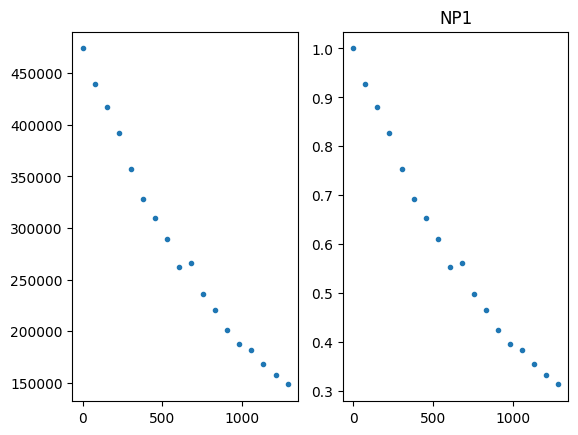

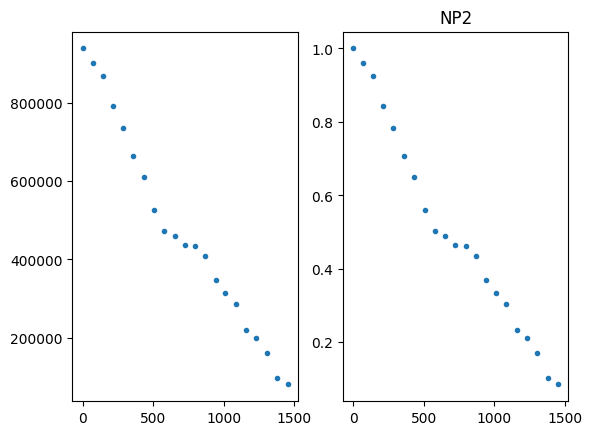

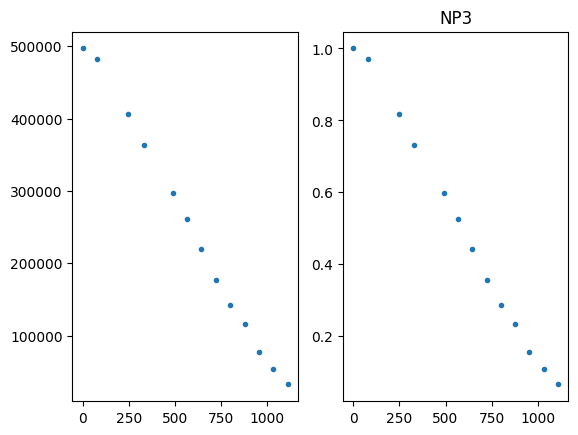

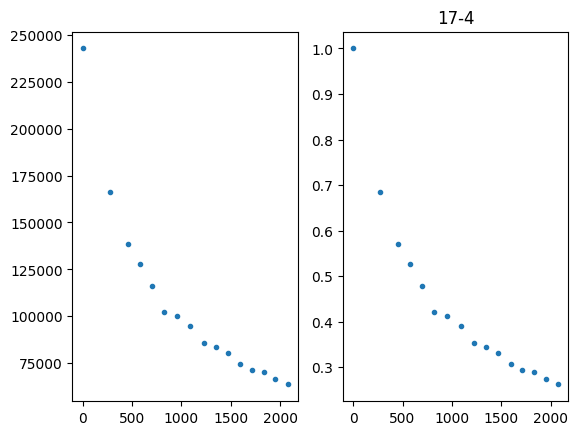

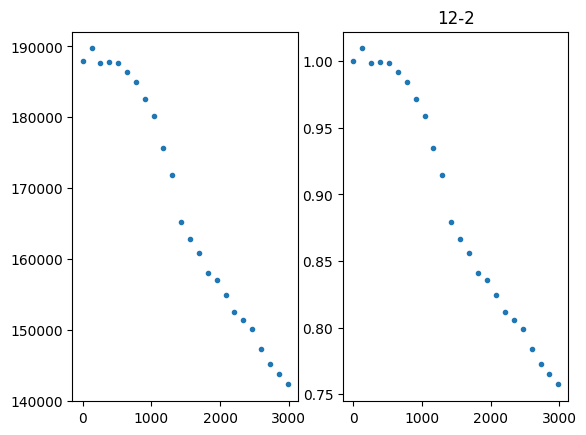

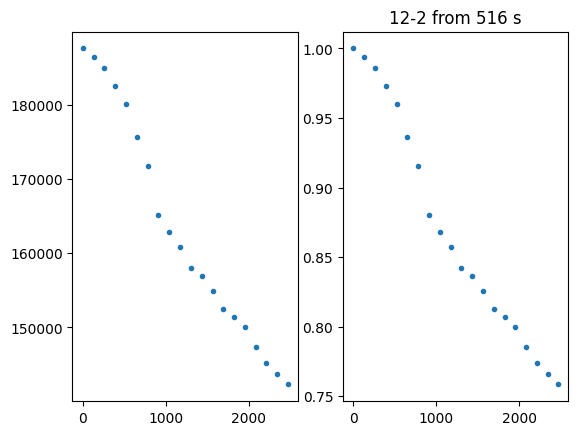

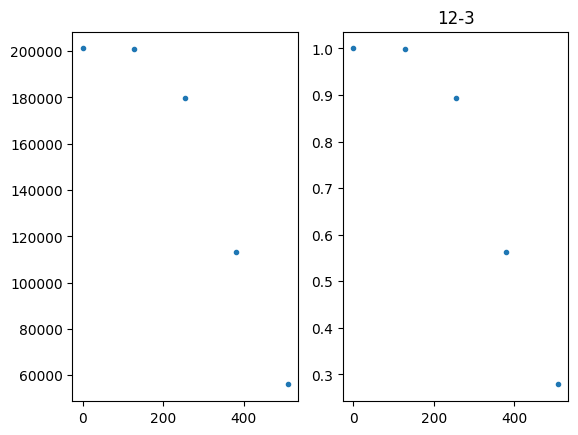

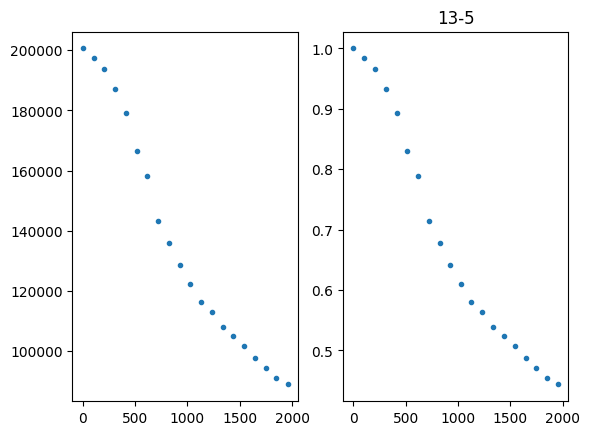

In [7]:
for key in data:
    df_i = data[key]
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(df_i['t'], df_i['V'], '.')
    plt.subplot(1,2,2)
    plt.plot(df_i['t'], df_i['Vnorm'], '.')
    plt.title(key)

In [8]:
def find_rate(t, V):
    rate = []
    for i in range(len(t)-1):
        rate.append((V[i]-V[i+1])/(t[i+1]-t[i]))
    return np.array(rate)

def find_percent_rate(t, V):
    percent = []
    rate = []
    for i in range(len(t)-1):
        percent.append((V[i]-V[i+1])/V[i]*100)
        rate.append(percent[i]/(t[i+1]-t[i]))
    return np.array(percent), np.array(rate)

In [9]:
import matplotlib
from matplotlib import font_manager

# Path to your Arial .ttf
arial_ttf_path = r"Arial.ttf"  # ← update this path for your system

# Register the font manually
font_manager.fontManager.addfont(arial_ttf_path)

# Tell Matplotlib to use it globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['font.size'] = 20     # use your input param
matplotlib.rcParams['svg.fonttype'] = 'none'       # keep text editable in SVG

In [10]:
V_Cu3As = np.array([88882.54178918, 72130.44617626, 48465.35036928, 38299.2164905,
                    18064.37995315,  6867.07874611,  2254.03847885])
t_Cu3As = np.linspace(0, 960, 7)

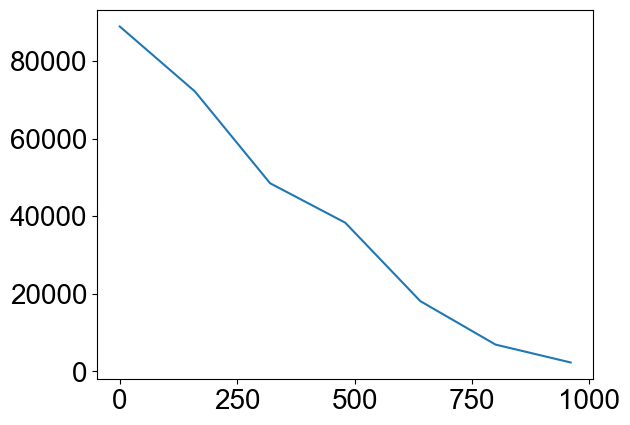

In [11]:
plt.plot(t_Cu3As, V_Cu3As)

In [12]:
V_chiral_Au = np.array([7503083.075456, 6533457.598848, 5510361.288832, 4576291.024704,
                        3492691.70432 , 2833283.813568, 2094326.885504])
t_chiral_Au = np.linspace(0, 1614, 7)

In [13]:
data['Cu3As'] = pd.DataFrame({'t': t_Cu3As,
                              'V': V_Cu3As,
                              'Vnorm': V_Cu3As/V_Cu3As[0]})
data['Chiral_Au'] = pd.DataFrame({'t': t_chiral_Au,
                                  'V': V_chiral_Au,
                                  'Vnorm': V_chiral_Au/V_chiral_Au[0]})

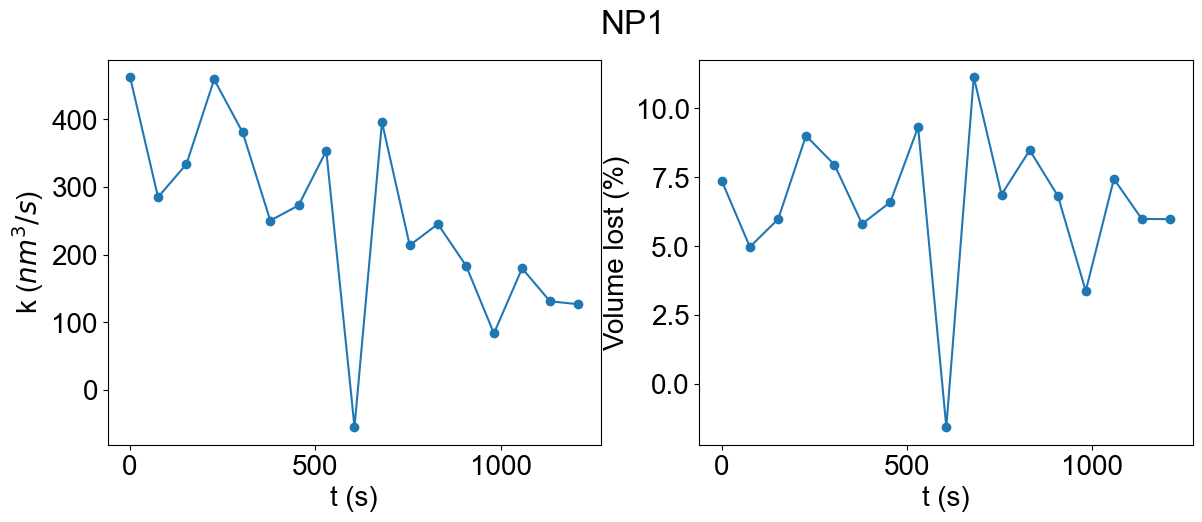

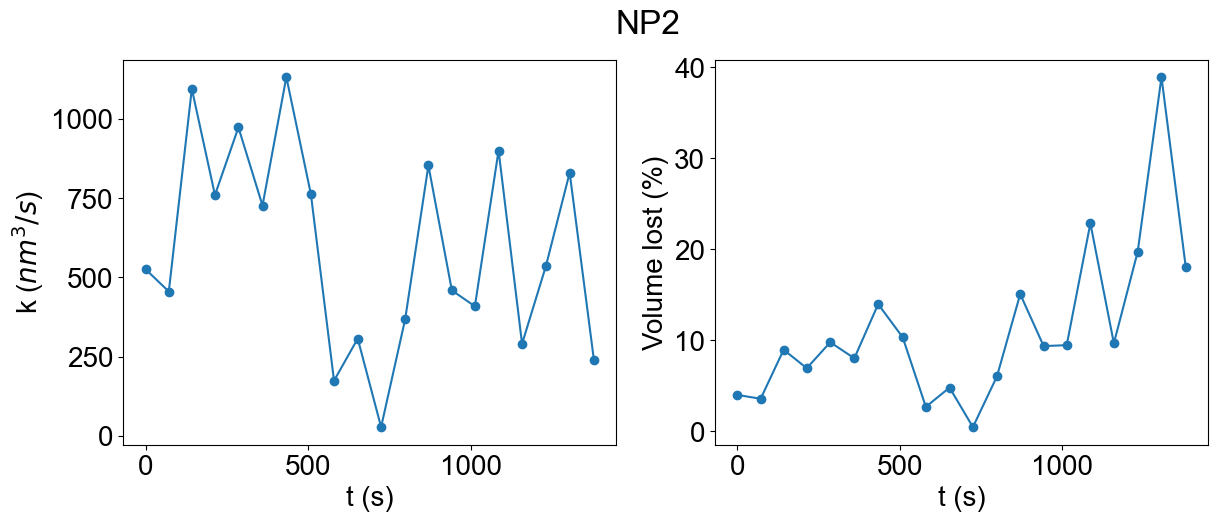

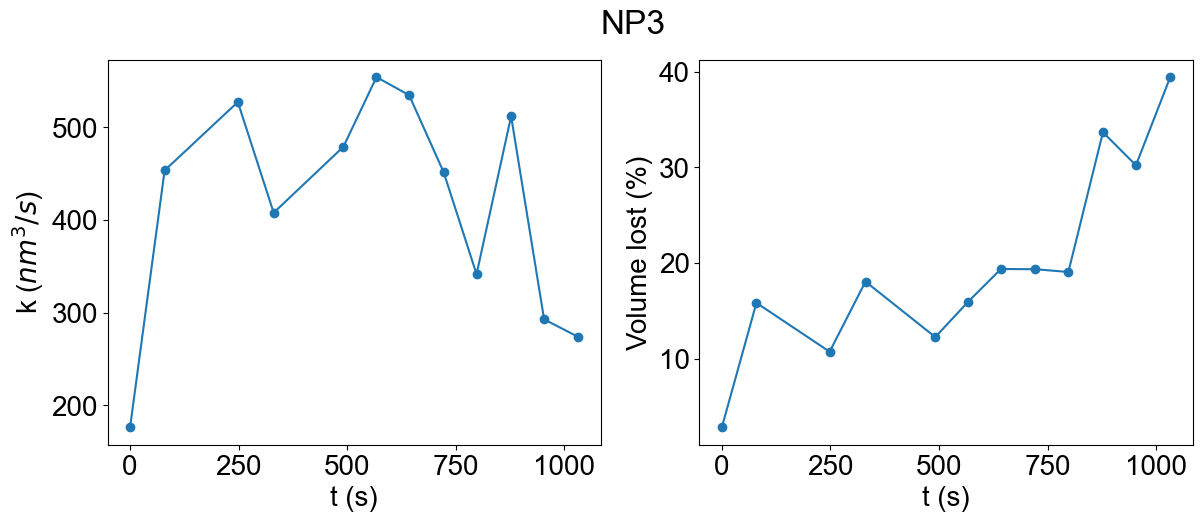

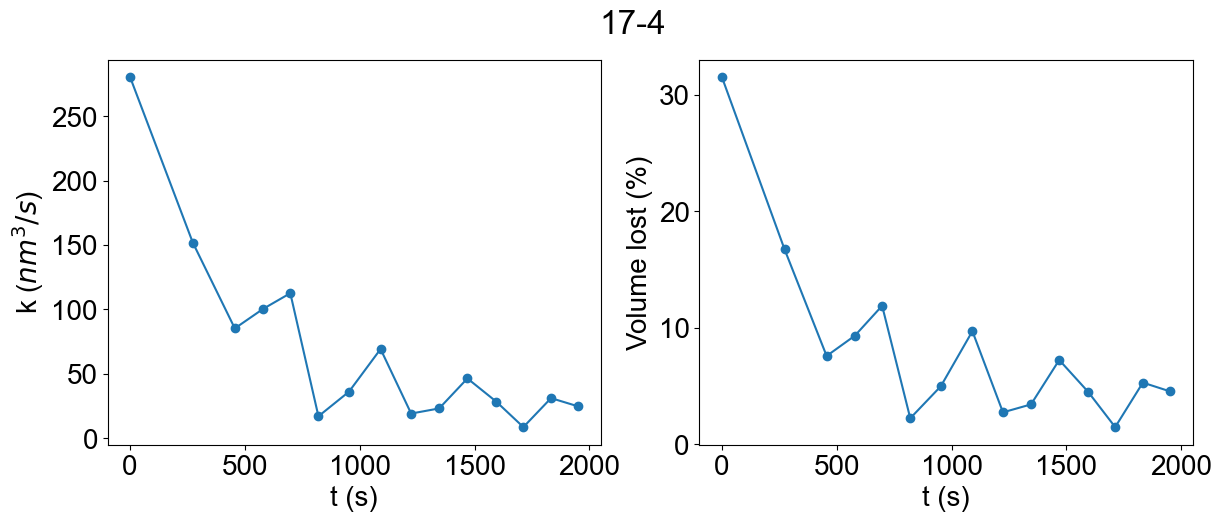

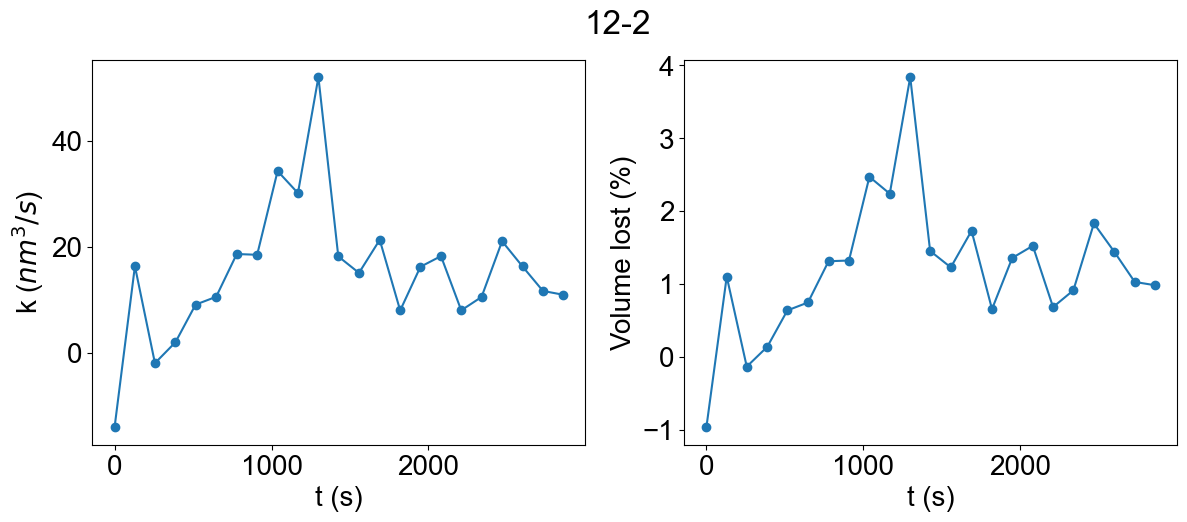

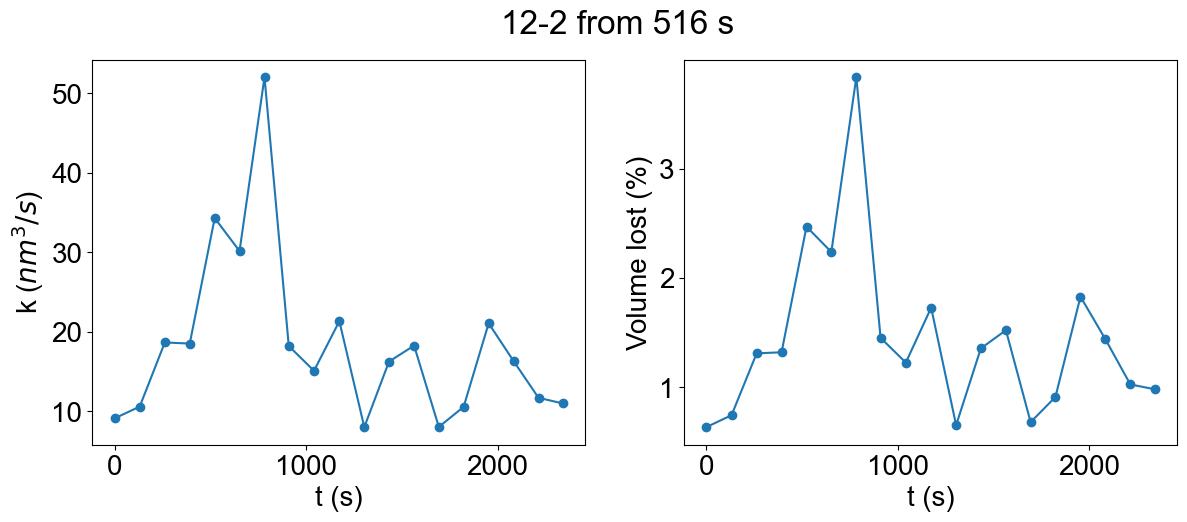

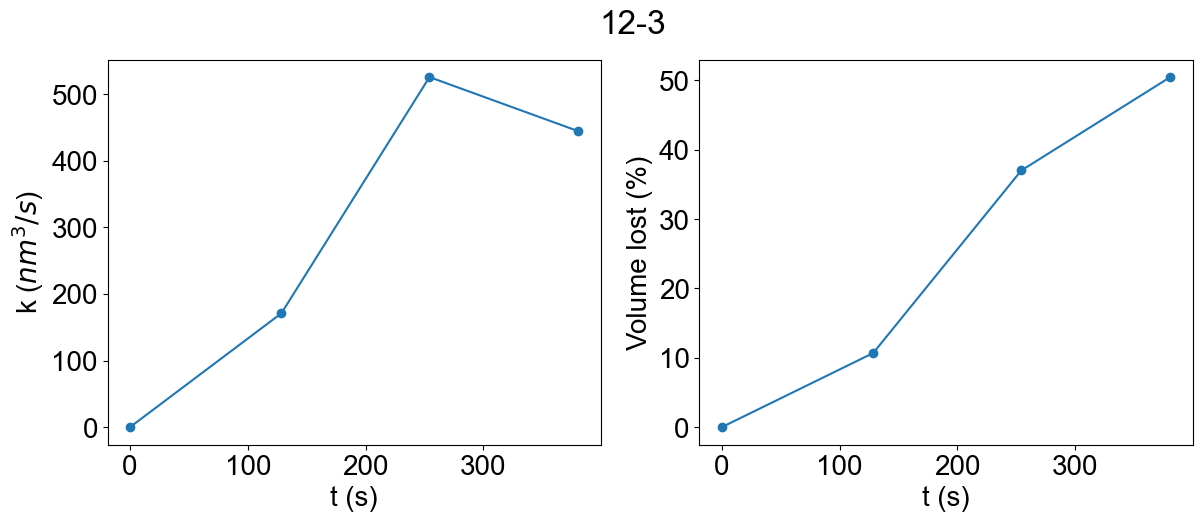

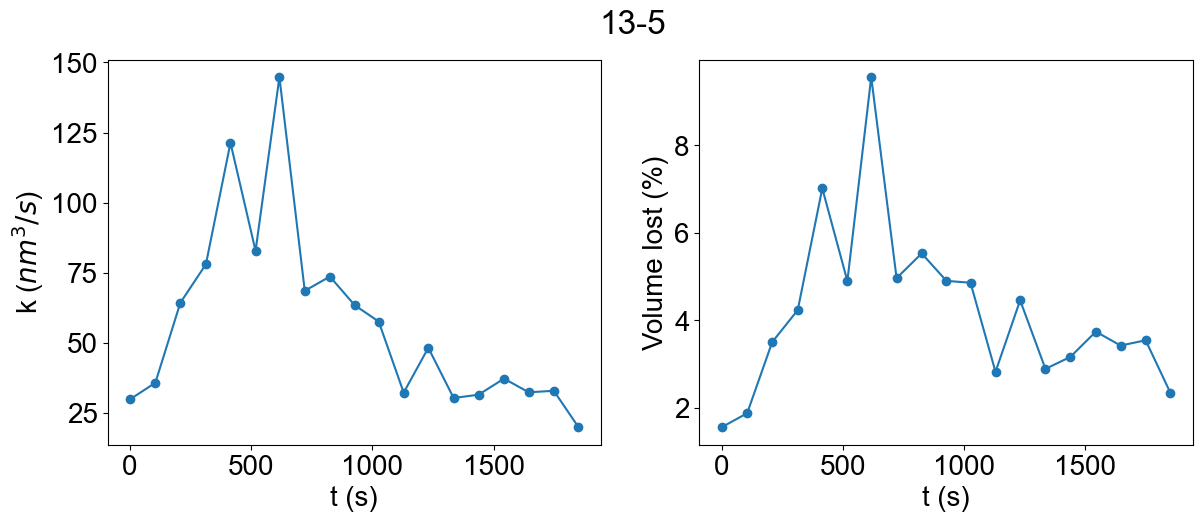

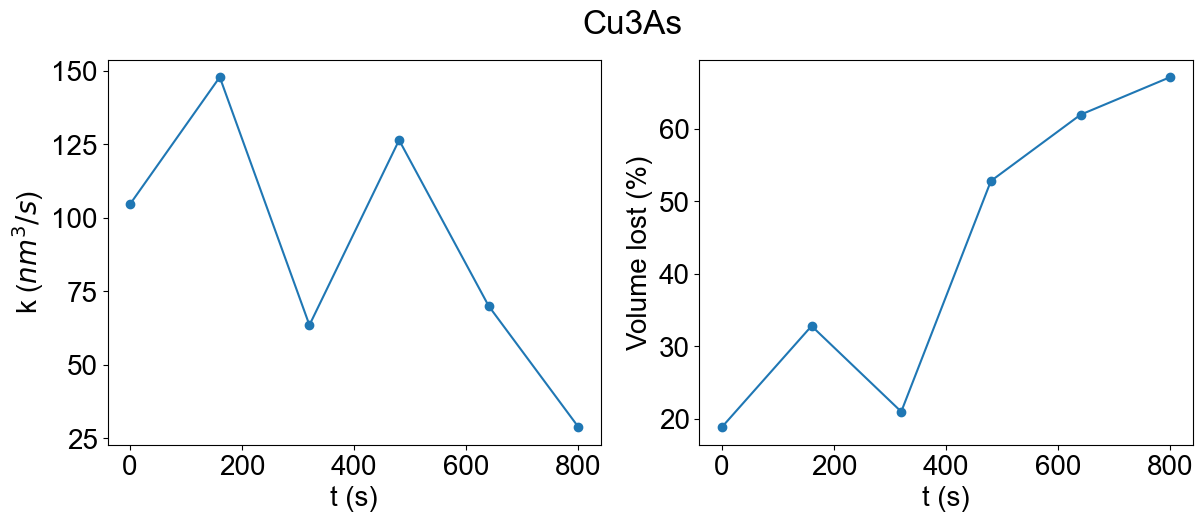

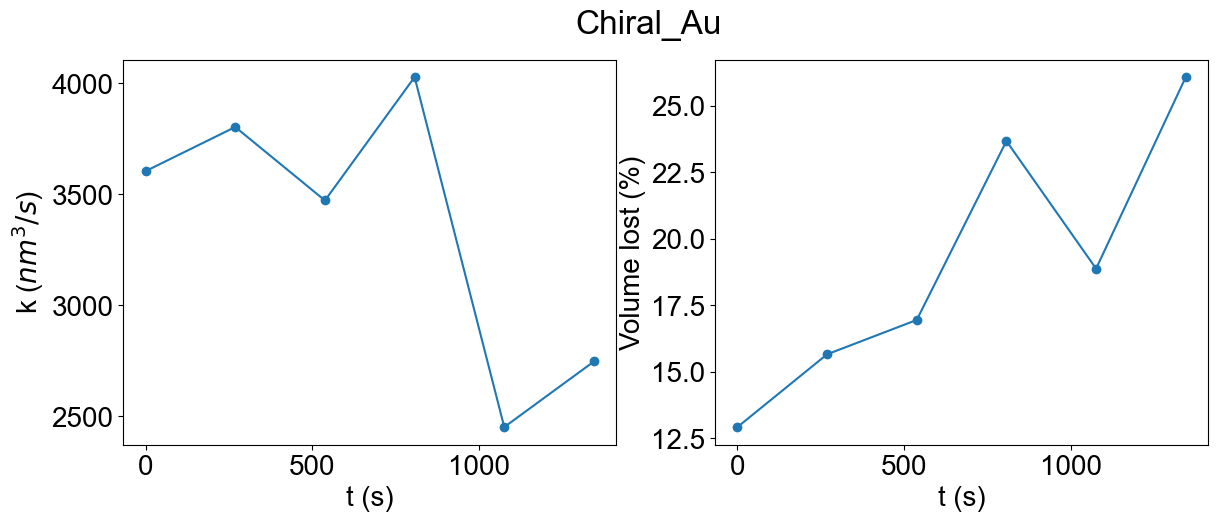

In [14]:
for key in data:
    df_i = data[key]
    fig = plt.figure(figsize=(14, 5))
    fig.suptitle(key)
    plt.subplot(1,2,1)
    plt.plot(df_i['t'][:-1], find_rate(df_i['t'], df_i['V']), '-o')
    plt.xlabel("t (s)")
    plt.ylabel(r"k ($nm^3/s$)")
    plt.subplot(1,2,2)
    percent, _ = find_percent_rate(df_i['t'], df_i['V'])
    plt.plot(df_i['t'][:-1], percent, '-o')
    plt.xlabel("t (s)")
    plt.ylabel(r"Volume lost (%)")

In [15]:
from pwlr import *


Fitted linear regime(s) in NP1 (0 - 1285.0167 s )
V0 = 473966 nm^3, dt = 71.39 s
  Segment 1: y = -347.2·x + 4.684e+05    (slope SE = 9.01)
  Segment 2: y = -277.1·x + 4.509e+05    (slope SE = 28)
  Segment 3: y = -134.9·x + 3.218e+05    (slope SE = 7.35)


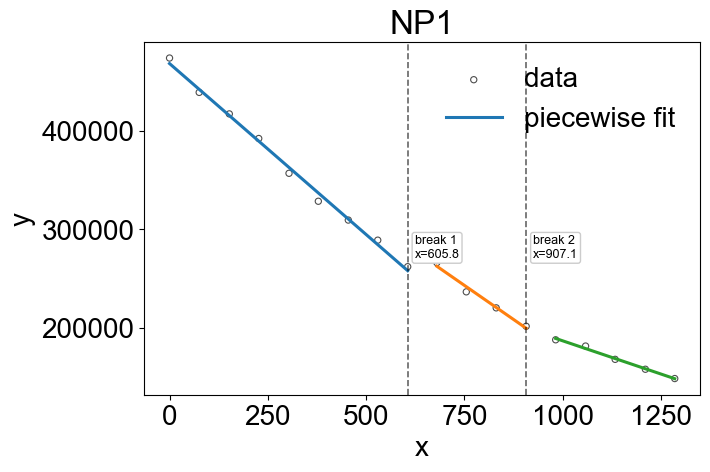


Fitted linear regime(s) in NP2 (0 - 1453.4214 s )
V0 = 939844 nm^3, dt = 69.21 s
  Segment 1: y = -788.5·x + 9.58e+05    (slope SE = 38)
  Segment 2: y = -387.5·x + 7.126e+05    (slope SE = 87.7)
  Segment 3: y = -561·x + 8.852e+05    (slope SE = 16.1)


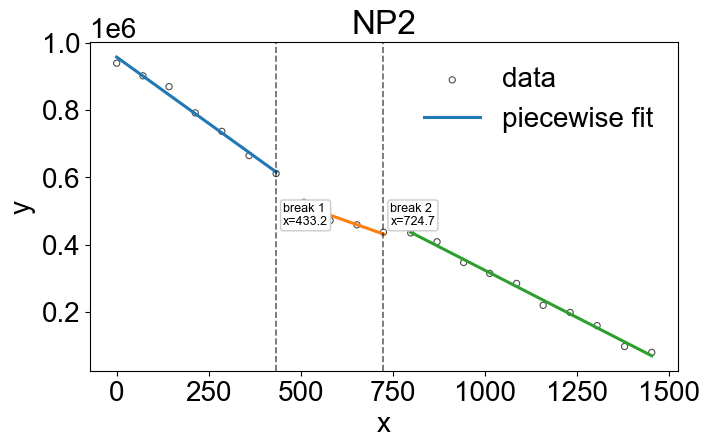


Fitted linear regime(s) in NP3 (0 - 1109.4584 s )
V0 = 496973 nm^3, dt = 85.34 s
  Segment 1: y = -439.6·x + 5.092e+05    (slope SE = 13.8)
  Segment 2: y = -378.7·x + 4.462e+05    (slope SE = 18.1)


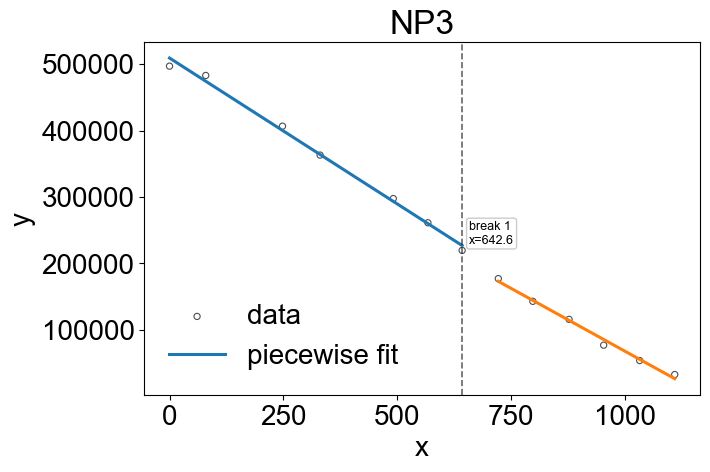


Fitted linear regime(s) in 17-4 (0 - 2074.4185 s )
V0 = 242763 nm^3, dt = 129.65 s
  Segment 1: y = -201.4·x + 2.347e+05    (slope SE = 30.9)
  Segment 2: y = -35.22·x + 1.334e+05    (slope SE = 2.23)


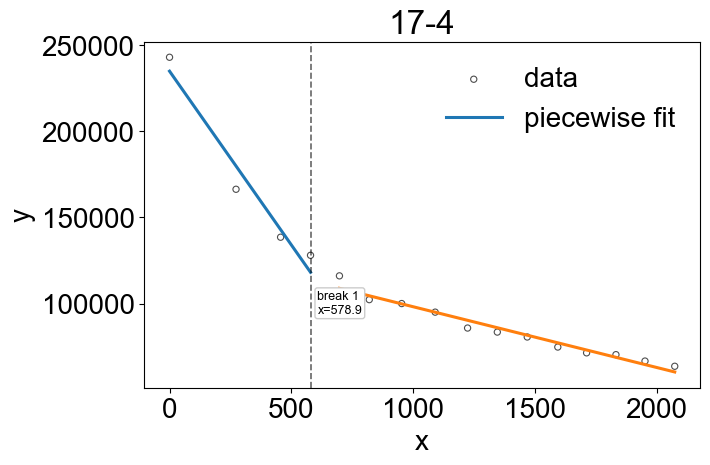


Fitted linear regime(s) in 12-2 (0 - 2985.6368 s )
V0 = 187906 nm^3, dt = 124.40 s
  Segment 1: y = -4.209·x + 1.891e+05    (slope SE = 1.34)
  Segment 2: y = -28.32·x + 2.088e+05    (slope SE = 2.32)
  Segment 3: y = -14.57·x + 1.853e+05    (slope SE = 0.269)


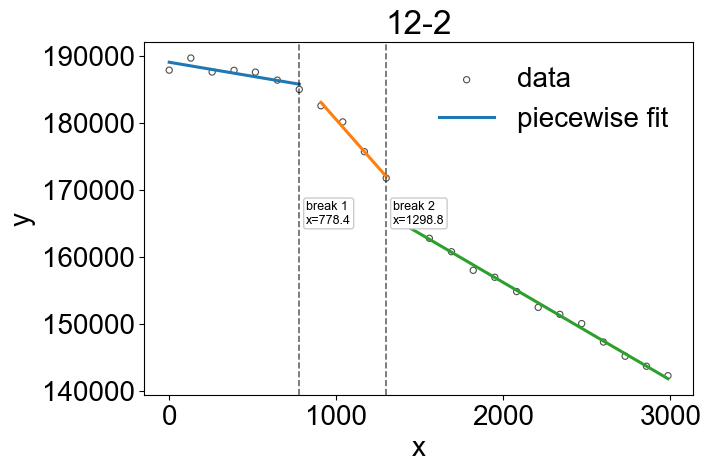


Fitted linear regime(s) in 12-2 from 516 s (0 - 2469.59 s )
V0 = 187611 nm^3, dt = 123.48 s
  Segment 1: y = -12.56·x + 1.879e+05    (slope SE = 1.57)
  Segment 2: y = -37.82·x + 2.003e+05    (slope SE = 3.31)
  Segment 3: y = -14.35·x + 1.774e+05    (slope SE = 0.281)


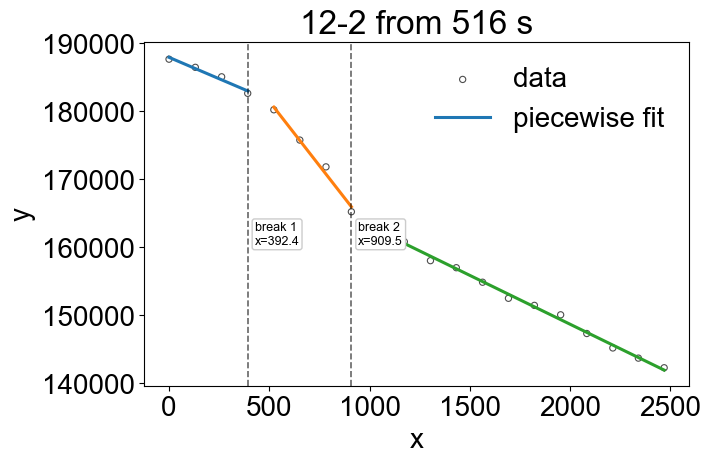


Fitted linear regime(s) in 13-5 (0 - 1957.701451 s )
V0 = 200567 nm^3, dt = 97.89 s
  Segment 1: y = -42.66·x + 2.014e+05    (slope SE = 5.72)
  Segment 2: y = -100·x + 2.19e+05    (slope SE = 5.55)
  Segment 3: y = -35.36·x + 1.566e+05    (slope SE = 1.17)


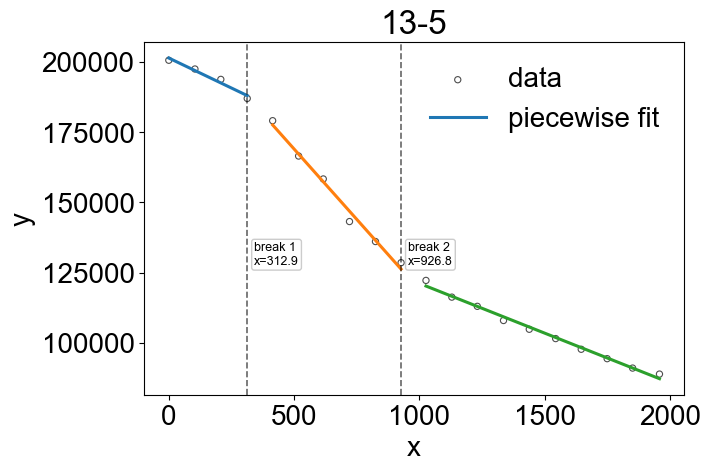


Fitted linear regime(s) in Cu3As (0 - 960.0 s )
V0 = 88883 nm^3, dt = 137.14 s
  Segment 1: y = -93.93·x + 8.437e+04    (slope SE = 6.93)


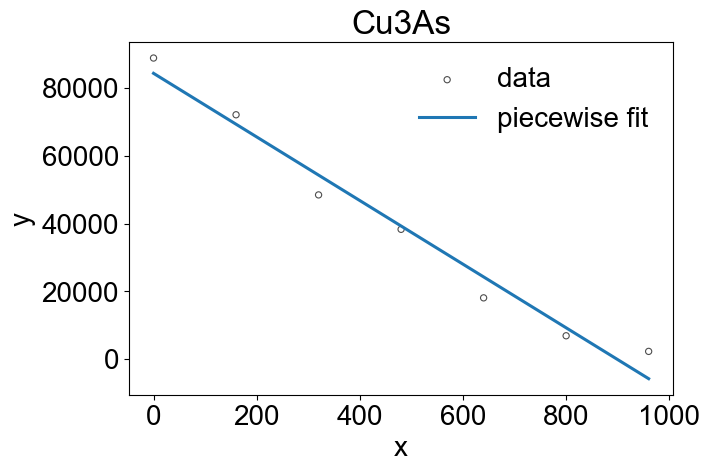


Fitted linear regime(s) in Chiral_Au (0 - 1614.0 s )
V0 = 7503083 nm^3, dt = 230.57 s
  Segment 1: y = -3405·x + 7.397e+06    (slope SE = 108)


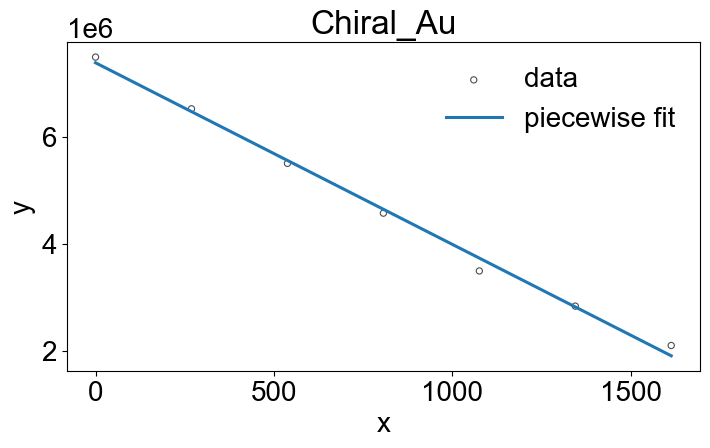

In [25]:
for key in data:
    df_i = data[key]
    t = df_i['t']
    V = df_i['V']
    if len(V)<6:
        continue
    model = piecewise_linear_regression(t, V, max_segments=3, criterion="bic", min_segment_size=4)
    
    print("\nFitted linear regime(s) in "+key+" (0 - "+str(t.max())+" s )" )
    print(f"V0 = {V[0]:.0f} nm^3, dt = {t[len(t)-1]/len(t):.2f} s")
    for i, seg in enumerate(model.segments, 1):
        xs = model.x_sorted[seg.start:seg.end + 1]
        ys = model.y_sorted[seg.start:seg.end + 1]
        n = xs.size
    
        # OLS uncertainty of slope: SE(a) = sqrt( s^2 / Sxx )
        # where s^2 = SSE / (n-2) and Sxx = sum( (x - x̄)^2 )
        if n > 2:
            xbar = xs.mean()
            Sxx = np.sum((xs - xbar) ** 2)
            s2 = seg.sse / (n - 2) if (n - 2) > 0 else np.nan
            se_slope = np.sqrt(s2 / Sxx) if (Sxx > 0) else np.nan
        else:
            se_slope = np.nan  # not enough DoF
    
        sign = " + " if seg.intercept >= 0 else " − "
        se_txt = f"{se_slope:.3g}" if np.isfinite(se_slope) else "NA"
        print(f"  Segment {i}: y = {seg.slope:.4g}·x{sign}{abs(seg.intercept):.4g}    (slope SE = {se_txt})")
    fig, (ax_main, ax_resid) = plot_piecewise_fit(t, V, model, show_equations=False)
    ax_main.set_title(key)
    plt.show()

In [20]:
ax_main

<Axes: xlabel='x', ylabel='y'>